# 1) Importing Libraries

In [51]:
import numpy as np 
import pandas as pd 
import re
from tqdm import tqdm


# For Preprocesssing Text Data


from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import the train test split
from sklearn.model_selection import train_test_split

# Check Performance
from sklearn.metrics import classification_report

# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Helps to extract the data using regular expressions
import re

# Helps to visualize the wordcloud
#pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from gensim.models import Word2Vec

import nltk
from nltk.corpus import stopwords

# Used in Tokenization
from nltk.tokenize import word_tokenize, sent_tokenize

from sklearn.model_selection import train_test_split

# Importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score,classification_report

# 2) Importing Dataset

In [15]:
df = pd.read_csv(r"C:\IPBA Files\BYOP Files\Sentiment Analysis\Comments Data\Balenciaga_Comments_.csv")

In [16]:
df=data[['Comments','text_length']]

In [17]:
df.head()

,Comments,text_length
0,thank you for making this and calling them out,47
1,hi blaire im surprised when you said youre not...,258
2,blaire you rock thank you for talking about th...,213
3,kids are the one thing we should all agree wit...,75
4,i always say the most wretched of them all are...,144


# 3) Descriptive Stats

In [18]:
df['Comments'] = df['Comments'].astype(str)

In [19]:
df.shape

(26530, 2)

<AxesSubplot: ylabel='Frequency'>

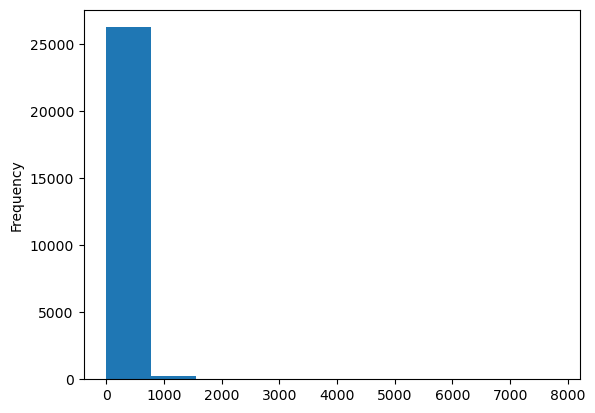

In [20]:
df['text_length'].plot.hist(bins = 10)

# 4) Cleaning - URL & Punctuation Removal

In [21]:
# URLs removal and extra spaces too

df['Comments'] = df['Comments'].apply(lambda x: re.sub(r'https?\S+ðŸ˜žðŸ˜­ðŸ¤¬', '', x).strip())

In [22]:
data.head(10)

,Comments,text_length
0,thank you for making this and calling them out,47
1,hi blaire im surprised when you said youre not...,258
2,blaire you rock thank you for talking about th...,213
3,kids are the one thing we should all agree wit...,75
4,i always say the most wretched of them all are...,144
5,i’ve been doing a lot of research and it’s sta...,612
6,dont u think the same people are just going to...,89
7,im pretty sure no one normal left or right lib...,167
8,thank you for your content blaire,34
9,give your clothes to charity instead of throwi...,65


In [23]:
##Remove punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [25]:
# Mutating function to dataset
df['Comments'] = df['Comments'].apply(remove_punctuations)

In [28]:
# Converting to lower Case
df['Comments']=df['Comments'].apply(lambda x: x.lower())

In [36]:
df.head(20)

,Comments,text_length
0,thank making calling,47
1,hi blaire im surprised said youre spiritual do...,258
2,blaire rock thank talking issue calling celebr...,213
3,kids one thing agree dont fuck kids period,75
4,always say wretched similar priviledged comes ...,144
5,i’ve lot research it’s staggering what’s shoad...,612
6,dont u think people going create brands thing,89
7,im pretty sure one normal left right lib sedit...,167
8,thank content blaire,34
9,give clothes charity instead throwing fire 🔥,65


# 5) Cleaning - Remove Stopwords & emoticons & special characters

In [30]:
# Get Stopwords
stop = stopwords.words('english')

In [33]:
# Tokenize and Remove Stop Words
df['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

0                                 [thank, making, calling]
1        [hi, blaire, im, surprised, said, youre, spiri...
2        [blaire, rock, thank, talking, issue, calling,...
3        [kids, one, thing, agree, dont, fuck, kids, pe...
4        [always, say, wretched, similar, priviledged, ...
                               ...                        
26525    [dont, see, anything, wrong, children, holding...
26526    [appealing, specific, people, know, wealthy, a...
26527    [course, wasnt, everything, well, planned, mak...
26528    [lol, youre, person, much, insight, intellect,...
26529                                            [explain]
Name: Comments, Length: 26530, dtype: object

In [34]:
df['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

0                                     thank making calling
1        hi blaire im surprised said youre spiritual do...
2        blaire rock thank talking issue calling celebr...
3               kids one thing agree dont fuck kids period
4        always say wretched similar priviledged comes ...
                               ...                        
26525    dont see anything wrong children holding bears...
26526    appealing specific people know wealthy afford ...
26527    course wasnt everything well planned make ever...
26528    lol youre person much insight intellect huh 😅 ...
26529                                              explain
Name: Comments, Length: 26530, dtype: object

In [35]:
# Join the words back
df['Comments'] = df['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [37]:
##Remove emoticons

def remove_emoticons(text):
    emoticon_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoticon_pattern.sub(r'', text)



In [38]:

# Apply the remove_emoticons function to the 'Comments' column
df['Comments'] = df['Comments'].apply(remove_emoticons)

In [39]:
df.head()

,Comments,text_length
0,thank making calling,47
1,hi blaire im surprised said youre spiritual do...,258
2,blaire rock thank talking issue calling celebr...,213
3,kids one thing agree dont fuck kids period,75
4,always say wretched similar priviledged comes ...,144


# 6)Lemmatize

In [ ]:
#import nltk

nltk.download('omw-1.4')

In [40]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [42]:
# Commit to Table

df['Comments'] = df['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

# 7) Assigning Labels to the dataset

In [43]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Generate sentiment scores
sentiment_scores = df['Comments'].apply(sid.polarity_scores)

In [44]:
df["score"] = sentiment_scores.apply(lambda x: x['compound'])

In [45]:
df.head()

,Comments,text_length,score
0,thank making calling,47,0.3612
1,hi blaire im surprised said youre spiritual do...,258,0.9298
2,blaire rock thank talking issue calling celebr...,213,0.0000
3,kids one thing agree dont fuck kids period,75,0.6542
4,always say wretched similar priviledged comes ...,144,-0.6124


In [46]:
count_total=0
count_pos=0
count_neg=0
count_neut=0


for i in df["score"]:
    if i >0:
        count_pos=count_pos+1
    elif i <0:
        count_neg = count_neg +1
    else:
        count_neut = count_neut +1
        
 

print("positive tweets:",count_pos)
print("negative tweets:",count_neg)
print("neutral tweets:",count_neut)
conditions = [
    (df['score'] >0),
    (df['score'] <0),
    (df['score'] == 0)]
choices = [1,-1,0]
df['sentiment'] = np.select(conditions, choices )

positive tweets: 8872
negative tweets: 11610
neutral tweets: 6048


In [47]:
df.head()

,Comments,text_length,score,sentiment
0,thank making calling,47,0.3612,1
1,hi blaire im surprised said youre spiritual do...,258,0.9298,1
2,blaire rock thank talking issue calling celebr...,213,0.0000,0
3,kids one thing agree dont fuck kids period,75,0.6542,1
4,always say wretched similar priviledged comes ...,144,-0.6124,-1


In [50]:
for i in df['sentiment']:
    if i >0:
        lable= ("Positive")
    elif i <0:
        lable= ("Negative")
    else:
        lable= ("Neutral")

        
(df['sentiment'] >0),
(df['sentiment'] <0),
(df['sentiment'] == 0)
choices = ["Positive","Negative","Neutral"]

df['Labels'] = np.select(conditions, choices )

# 8) Word2Vec

There are 2420835 words in the combination of all texts.


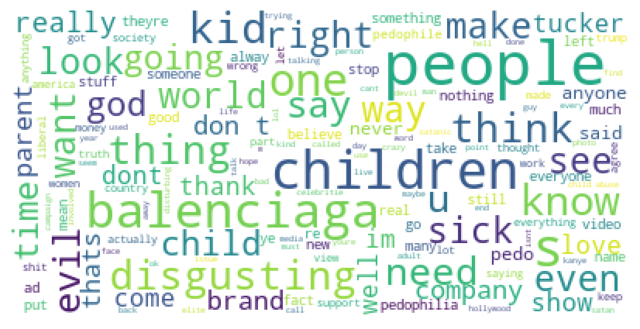

In [52]:
all_texts = " ".join(texts for texts in df.Comments)
print ("There are {} words in the combination of all texts.".format(len(all_texts)))

# Lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size = 40, max_words = 150, background_color="white").generate(all_texts)
plt.figure(figsize = (8,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 8.1) Data cleanup before pre-processing

In [53]:
df['Comments'][0:10]

0                                 thank making calling
1    hi blaire im surprised said youre spiritual do...
2    blaire rock thank talking issue calling celebr...
3           kids one thing agree dont fuck kids period
4    always say wretched similar priviledged comes ...
5    i’ve lot research it’s staggering what’s shoad...
6        dont u think people going create brands thing
7    im pretty sure one normal left right lib sedit...
8                                 thank content blaire
9          give clothes charity instead throwing fire 
Name: Comments, dtype: object

Regex Expressions

A regular expression matches a broad or specific text pattern, and is strictly read left-to-right.

'^' is a symbol that extracts characters that starts with a given pattern.
Let's apply the expression on a single data point, and see the results:

In [57]:
print("Before applying the expression :", df['Comments'][5])
pattern = '[^a-zA-Z0-9]'
res = re.sub(pattern, ' ', df['Comments'][5])

print("After applying the expression :", res)

Before applying the expression : i’ve lot research it’s staggering what’s shoadows powerful corrupt things starting make since especially tie bombshell epstine story deep goes i’m finding many links occult demonic specificity worship baal represented bull moloch represented owl god child sacrifice open eyes realize evil control happened said quiet part loud find say quite part loud
After applying the expression : i ve lot research it s staggering what s shoadows powerful corrupt things starting make since especially tie bombshell epstine story deep goes i m finding many links occult demonic specificity worship baal represented bull moloch represented owl god child sacrifice open eyes realize evil control happened said quiet part loud find say quite part loud


We can clearly observe that we have removed the special characters and numbers from the text. Also, we observe that there are extra spaces in many places in the text - let's remove these using another regular expression.

\s+: The regular expression \s is a predefined character class. It indicates a single whitespace character. The plus sign + is a greedy quantifier, which means one or more times.

In [58]:
print("Before applying the expression :", res)
pattern = '\s+'
resf = re.sub(pattern, ' ', res)

print("After applying the expression :", resf)

Before applying the expression : i ve lot research it s staggering what s shoadows powerful corrupt things starting make since especially tie bombshell epstine story deep goes i m finding many links occult demonic specificity worship baal represented bull moloch represented owl god child sacrifice open eyes realize evil control happened said quiet part loud find say quite part loud
After applying the expression : i ve lot research it s staggering what s shoadows powerful corrupt things starting make since especially tie bombshell epstine story deep goes i m finding many links occult demonic specificity worship baal represented bull moloch represented owl god child sacrifice open eyes realize evil control happened said quiet part loud find say quite part loud


We have successfully removed the extra spaces present in the text from the previous output.
Let's remove the numbers and other numerals from the data. The range [0-9] is not always equivalent to \d. In python3, [0-9] matches only 0123456789 characters, while \d matches [0-9] and other digit characters, for example Eastern Arabic numerals ٠١٢٣٤٥٦٧٨٩.

In [59]:
print("Before applying the expression :", resf)
pattern = '\d+'
resl = re.sub(pattern, ' ', resf)

print("After applying the expression :", resl)

Before applying the expression : i ve lot research it s staggering what s shoadows powerful corrupt things starting make since especially tie bombshell epstine story deep goes i m finding many links occult demonic specificity worship baal represented bull moloch represented owl god child sacrifice open eyes realize evil control happened said quiet part loud find say quite part loud
After applying the expression : i ve lot research it s staggering what s shoadows powerful corrupt things starting make since especially tie bombshell epstine story deep goes i m finding many links occult demonic specificity worship baal represented bull moloch represented owl god child sacrifice open eyes realize evil control happened said quiet part loud find say quite part loud


In [60]:
final_corpus = []

for i in range(df.shape[0]):
    
    # It removes the numbers, special characters, spaces
    
    text = re.sub('[^a-zA-Z0-9]', ' ', df['Comments'][i])
    
    # Lowering the text
    text = text.lower()

    # To remove the extra spaces in the data
    text = re.sub(r'\s+',' ',text)

    # To remove the numbers and other arabic numeric symbols
    text = re.sub(r'\d',' ',text)

    # Splitting the text
    text = text.split()
    
    # Removing the stopwords
    text = [word for word in text if not word in stopwords.words('english')]
    
    # joining the words into text
    text = ' '.join(text)
    
    # appending the text to the final_corpus list
    final_corpus.append(text)
    
df['final_text'] = final_corpus

Let's look at the top 150 unique words in the feedback where we have applied some preprocessing steps:

There are 2359247 words in the combination of all texts.


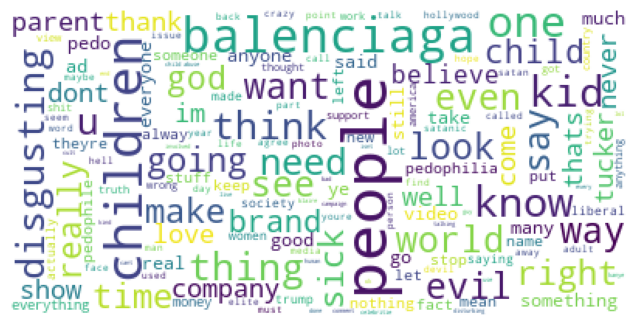

In [61]:
all_texts1 = " ".join(texts for texts in df.final_text)
print ("There are {} words in the combination of all texts.".format(len(all_texts1)))

# Lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size = 40, max_words = 150, background_color="white").generate(all_texts1)
plt.figure(figsize = (8,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 9) Word Embeddings

Word Embeddings are a word representation type that represents words with a 1-Dimensional vector. The representations are such that words with similar meanings or similar semantics will have similar vectors. This is a Natural Language Understanding technique to map words into vectors of real numbers using various ML methods such as Neural Networks, probabilistic models, or dimensionality reduction on the word co-occurrence matrix. Some important word embedding models are Word2vec (Google), GloVe (Stanford), and FastText (Facebook).

In this notebook, we are going to look at the Word2vec and GloVe implementations of word embeddings.

# 9.1) Word2vec
Word2vec is a group of shallow, two-layer neural networks that are trained to represent the linguistic and contextual similarity of words through numbers based on their semantics as received from the corpus of text it is trained on.
Word2vec takes as its input a large corpus or document of text and produces a vector space. The choice for the dimensionality of the vector space /embedding vector is typically a few hundreds. Each unique word in the document is assigned a corresponding vector in the space.
Word vectors are positioned in the vector space such that words that share common contexts/meaning in the corpus are located close to one another in the space. Mathematically, the embeddings of these words will have a dot product closer to 1.
Embeddings learned through Word2vec have proven to be successful on a variety of Natural Language Processing tasks.
Word2vec retains the semantic meaning of different words in a document. The context information might be lost, which is why, while using Word Embeddings in a Neural Network architecture, we use a Context vector along with the input and output vectors. Another great advantage of the Word2vec approach is that the size of the embedding vector is small in comparison to the vocabulary size.

In [63]:
words_list =[]

for i in df['final_text']:
    
    li = list(i.split(" "))
    
    words_list.append(li)

In [64]:
words_list[0:5]

[['thank', 'making', 'calling'],
 ['hi',
  'blaire',
  'im',
  'surprised',
  'said',
  'youre',
  'spiritual',
  'dont',
  'believe',
  'god',
  'youre',
  'enlightened',
  'soul',
  'aligned',
  'truth',
  'thats',
  'rare',
  'world',
  'keep',
  'good',
  'work',
  'thank',
  'supporting',
  'jk',
  'rowling'],
 ['blaire',
  'rock',
  'thank',
  'talking',
  'issue',
  'calling',
  'celebrities',
  'left',
  'silent',
  'earth',
  'fighting',
  'pedophilia',
  'partisan',
  'issue',
  'must',
  'everybodys',
  'goal'],
 ['kids', 'one', 'thing', 'agree', 'dont', 'fuck', 'kids', 'period'],
 ['always',
  'say',
  'wretched',
  'similar',
  'priviledged',
  'comes',
  'greed',
  'lack',
  'morals']]

# 9.1.1) Creating Word2vec word embeddings

Word2vec takes the following three important parameters:

Min_count: It will ignore all the words with a total frequency lower than this.

Workers: These are the threads to train the model.

In [ ]:
!pip install --user gensim==3.8.3

In [65]:
import gensim
print(gensim.__version__)

4.1.2


In [66]:
# Model creation   
model= Word2Vec(words_list, min_count = 1, workers = 4)

In [67]:
model

In [68]:
# saving the model
model.save("word2vec.model")

In [69]:
words = model.wv.key_to_index
len(words)

25846

Observations:

Every word get mapped to an appropriate word index from the whole text present in the data.
Let's check out a random word embedding using the trained model:

In [70]:
word = "balenciaga"
model.wv[word]

array([-5.6281739e-01,  7.3145002e-01, -8.1602800e-01, -4.5021534e-02,
        4.4415507e-01, -7.1756399e-01, -1.4944589e-01,  1.6776147e+00,
       -9.3057948e-01, -1.5138502e-01,  1.4639308e-01, -9.5957446e-01,
       -7.0616163e-02,  8.3232701e-01,  5.9071434e-01, -1.2835521e+00,
        1.2643649e-01, -8.3994281e-01,  3.9821848e-01, -5.1617539e-01,
        1.8804914e-01,  9.2922771e-01,  5.4076701e-01, -8.8191815e-02,
        3.3514246e-01, -5.2713019e-01, -4.6576929e-01, -6.7406636e-01,
       -1.2807058e+00,  4.5486575e-01,  3.5807043e-01,  7.8969152e-04,
        1.5234974e-01, -9.3806148e-01,  1.4511034e-02,  1.5491512e+00,
       -3.2469049e-02, -8.2327962e-01, -3.6953023e-01, -1.2510076e+00,
        5.4336256e-01, -3.8649514e-01,  4.5940727e-01,  4.3096062e-02,
        8.4581411e-01,  4.9354765e-01, -7.1623051e-01, -5.3357419e-02,
        8.4364310e-02,  2.4518372e-01,  1.7132904e-01, -7.9054677e-01,
       -6.0000658e-01, -8.7322891e-01, -1.1181229e-01,  2.5683397e-01,
      

In [72]:
# Let's see the vocab size
print("Length of the vocab is = ", len(list(model.wv.key_to_index)))

Length of the vocab is =  25846


In [73]:
# Top 10 similar words to the word 'happy'

similar = model.wv.similar_by_word('happy')
print(similar)

[('hey', 0.9984983205795288), ('comment', 0.9980916976928711), ('details', 0.9973669052124023), ('mentioning', 0.9971145987510681), ('intelligent', 0.9968639612197876), ('information', 0.9968623518943787), ('lies', 0.9968550801277161), ('usual', 0.9967091679573059), ('needed', 0.9966940879821777), ('starting', 0.9966598749160767)]


In [75]:
# Top 10 similar words to the word 'bad'

similar = model.wv.similar_by_word('bad')
print(similar)

[('feel', 0.9927226305007935), ('things', 0.9898308515548706), ('happening', 0.9896591305732727), ('enough', 0.9896292090415955), ('stupid', 0.9883728623390198), ('crazy', 0.9882904291152954), ('matter', 0.9875957369804382), ('really', 0.9871302247047424), ('ppl', 0.9860818386077881), ('everything', 0.9855782985687256)]


# 9.1.2) Building the classifier

In [76]:
words = model.wv.key_to_index
wvs = model.wv[words]

In [77]:
from gensim.models import Word2Vec

In [78]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
   
def averaged_word_vectorizer(corpus, model, num_features):
    
    vocabulary = set(model.wv.key_to_index)
    
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    
    return np.array(features)




feature_size = 100

# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus = words_list, model = model,
                                             num_features = feature_size)
pd.DataFrame(w2v_feature_array)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.307252,0.952371,0.496839,0.150672,0.834821,-1.420005,0.264789,1.613145,-0.404977,-0.485607,...,0.576725,0.704213,0.361604,-0.040783,0.360677,0.669095,-0.301656,-0.666953,0.318423,0.779933
1,0.141948,0.688687,0.200033,0.222144,0.430787,-0.951535,0.298357,1.031480,-0.415786,-0.392268,...,0.516318,0.553644,0.171825,0.051895,0.427275,0.345280,-0.320638,-0.527878,0.164822,0.506253
2,0.021165,0.620182,0.107324,0.105930,0.508551,-0.889962,0.220898,1.277904,-0.359468,-0.258071,...,0.527550,0.602462,0.308615,-0.007071,0.314722,0.453150,-0.002199,-0.424176,0.261481,0.509785
3,-0.470767,0.715212,-0.259954,0.308075,0.504167,-1.154273,0.307417,1.295516,-0.827256,-0.224655,...,0.586201,0.697691,0.274299,0.117442,0.596699,0.481882,-0.081902,-0.277567,0.208526,0.354693
4,-0.091080,0.450201,-0.063303,0.121456,0.315860,-0.594155,0.119883,0.826924,-0.366482,-0.180800,...,0.428479,0.436508,0.147761,0.047632,0.328582,0.390453,-0.061039,-0.270602,0.147469,0.264502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26525,-0.485873,0.592995,-0.205769,0.271888,0.395727,-1.242270,0.259067,1.299019,-0.862396,-0.245478,...,0.598187,0.708467,0.341426,0.081838,0.593022,0.451339,-0.024004,-0.282228,0.189886,0.387476
26526,-0.051087,0.441606,0.032336,0.144896,0.262710,-0.739974,0.169256,0.841017,-0.450871,-0.222565,...,0.435557,0.459890,0.186630,0.046136,0.428488,0.356127,-0.120837,-0.397396,0.093957,0.306268
26527,-0.094233,0.519401,-0.078983,0.145435,0.333908,-0.689199,0.160914,0.936722,-0.419849,-0.189238,...,0.458534,0.485728,0.173158,0.064956,0.428754,0.474917,-0.074377,-0.378243,0.133065,0.284083
26528,-0.036480,0.484863,0.046487,0.134111,0.333239,-0.768578,0.199339,0.875885,-0.382128,-0.231986,...,0.393918,0.496514,0.178230,0.016872,0.345436,0.357517,-0.098021,-0.389735,0.159513,0.328088


In [80]:
y=df['Labels']

In [81]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(w2v_feature_array,y, test_size=0.2, random_state=42)

In [82]:
# intializing the Random Forest model
model = RandomForestClassifier(random_state = 7)

# fitting the model on training set
model.fit(xtrain,ytrain)

RandomForestClassifier(random_state=7)

In [83]:
# making predictions on the test set
y_pred = model.predict(xtest)

# checking the metrics
print(classification_report(y_pred, ytest))

              precision    recall  f1-score   support

    Negative       0.72      0.59      0.65      2793
     Neutral       0.50      0.65      0.56       949
    Positive       0.51      0.58      0.54      1564

    accuracy                           0.60      5306
   macro avg       0.58      0.61      0.59      5306
weighted avg       0.62      0.60      0.60      5306



# 9.2) GloVe Vectors
Global Vectors for Word Representation, also known as GloVe, is an alternative to Word2vec. Just like Word2vec, it is also an unsupervised learning algorithm that allows us to take a corpus of text, and intuitively map each word in that document into a position in a high-dimensional latent space which gives us the vector representation of the word.

# 9.2.1) Creating GloVe Vectors

In [84]:
# load the GloVe vectors in a dictionary:

embeddings_index = {}
f = open(r"C:\Users\himanshu.sharma2\Downloads\glove.6B\glove.6B.300d.txt", encoding="utf8")

for line in tqdm(f):
    # Splitting the each line 
    values = line.split()
    
    word = values[0]
    
    coefs = np.array(values[1:], dtype='float32')
    
    embeddings_index[word] = coefs
    
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [01:16, 5224.04it/s]

Found 400000 word vectors.


In [85]:
# This function creates a normalized vector for the whole sentence

def sent2vec(s):
    words = word_tokenize(s)
    N = []
    for w in words:
        try:
            N.append(embeddings_index[w])
        except:
            continue
    N = np.array(N)
    v = N.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [86]:
# Let's have a quick look on the independent feature
df.final_text.values

array(['thank making calling',
       'hi blaire im surprised said youre spiritual dont believe god youre enlightened soul aligned truth thats rare world keep good work thank supporting jk rowling',
       'blaire rock thank talking issue calling celebrities left silent earth fighting pedophilia partisan issue must everybodys goal',
       ...,
       'course wasnt everything well planned make everyone talk brand huge maybe get negative consequences sure hell survive survive long enough critics vanish brands name reach strengthening survive portuguese saying somewhat like talk good talk bad talk cognitive sciences known works wonders well remember whole trajectory something wayyy expansive brain easily remains things like name therefore familiarity',
       'lol youre person much insight intellect huh really need explanation thatwow',
       'explain'], dtype=object)

In [88]:
xtrain, xvalid, ytrain, yvalid = train_test_split(df.final_text.values, y, 
                                                  stratify = y, 
                                                  random_state = 42, 
                                                  test_size = 0.2, shuffle = True)

In [89]:
print("Shape of Training set : ", xtrain.shape)

print("Shape of test set : ", xvalid.shape)

print("Percentage of classes in training set:")

print(ytrain.value_counts(normalize = True))

print("Percentage of classes in test set:")

print(yvalid.value_counts(normalize = True))

Shape of Training set :  (21224,)
Shape of test set :  (5306,)
Percentage of classes in training set:
Negative    0.437618
Positive    0.334433
Neutral     0.227949
Name: Labels, dtype: float64
Percentage of classes in test set:
Negative    0.437618
Positive    0.334338
Neutral     0.228044
Name: Labels, dtype: float64


In [90]:
# Create sentence vectors using the above function for training and validation set
xtrain_glove = [sent2vec(x) for x in tqdm(xtrain)]
xvalid_glove = [sent2vec(x) for x in tqdm(xvalid)]

100%|████████████████████████████████████████████████████████████████████████████| 5306/5306 [00:02<00:00, 2452.43it/s]


# 9.2.2) Building the classifier

In [91]:
# intializing the Random Forest model
model = RandomForestClassifier(random_state = 7)

# fitting the model on training set
model.fit(xtrain_glove,ytrain)

RandomForestClassifier(random_state=7)

In [92]:
# making predictions on the test set
y_pred = model.predict(xvalid_glove)

# checking the metrics
print(classification_report(y_pred,yvalid))

              precision    recall  f1-score   support

    Negative       0.85      0.67      0.75      2930
     Neutral       0.56      0.76      0.64       882
    Positive       0.59      0.70      0.64      1494

    accuracy                           0.69      5306
   macro avg       0.66      0.71      0.68      5306
weighted avg       0.72      0.69      0.70      5306



In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yvalid,y_pred)

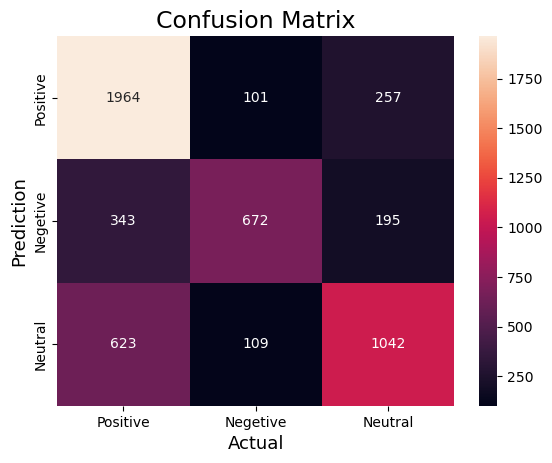

In [94]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Positive','Negetive','Neutral'],
            yticklabels=['Positive','Negetive','Neutral'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# 10) Conclusions
Both the models differ in the way they are trained, and hence they output different word vectors.

The GloVe model is based on global word-to-word co-occurrence counts taking the whole corpus into consideration, whereas Word2vec uses co-occurrence of local context (neighboring words).

GloVe learns its embeddings by constructing the overall co-occurrence matrix, on the other hand, the Word2vec model learns by making predictions by taking context words as inputs and predicting the target words.

Represent words as semantically-meaningful dense real-valued vectors.

This overcomes many of the problems that simple one-hot vector encodings have.

Most importantly, embeddings boost generalisation and performance for pretty much any NLP problem, especially if you don’t have a lot of training data.